#import libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import keras

#Load Data

In [ ]:
(X_train,y_train),(X_test,y_test)=tf.keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
#print the shape of data

In [ ]:
X_train.shape,y_train.shape,"**********",X_test.shape,y_test.shape

((60000, 28, 28), (60000,), '**********', (10000, 28, 28), (10000,))

In [ ]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [ ]:
y_train[0]

9

In [ ]:
class_labels =["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

In [ ]:
class_labels

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [ ]:
#show image

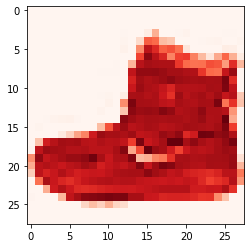

In [ ]:
plt.imshow(X_train[0],cmap='Reds')

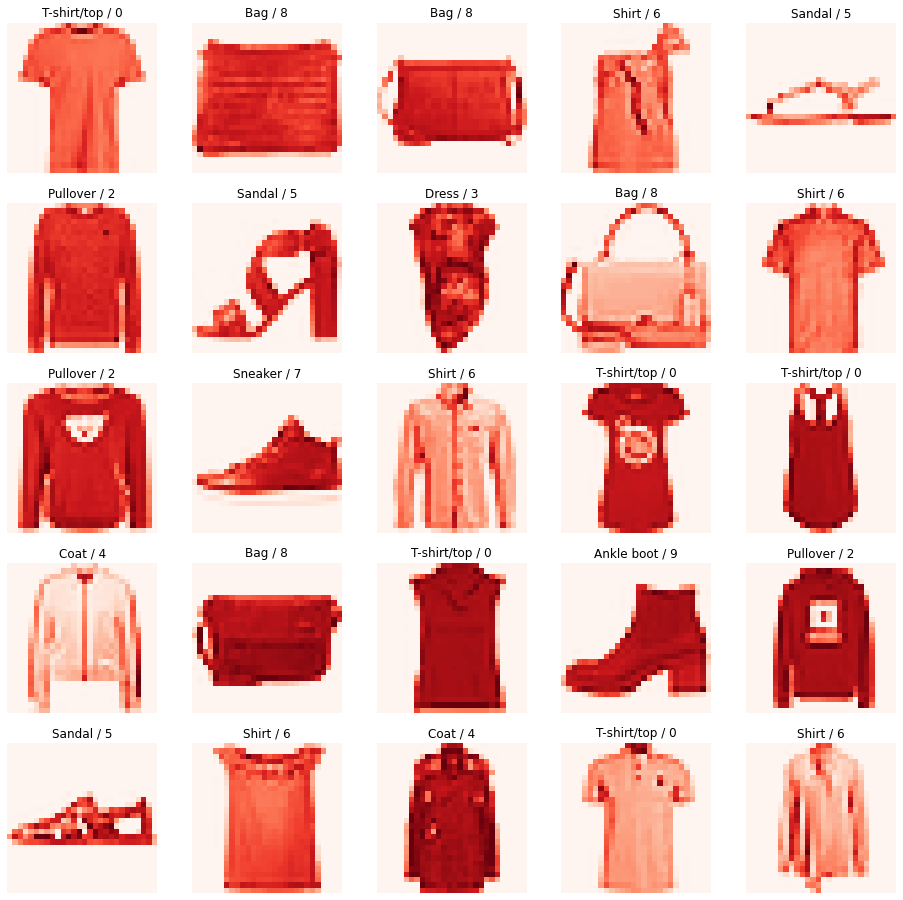

In [ ]:
plt.figure(figsize=(16,16))

j=1
for i in np.random.randint(0,1000,25):
  plt.subplot(5,5,j);j+=1
  plt.imshow(X_train[i],cmap='Reds')
  plt.axis('off')
  plt.title('{} / {}'.format(class_labels[y_train[i]],y_train[i]))

In [ ]:
X_train.ndim

3

In [ ]:
X_train=np.expand_dims(X_train,-1)

In [ ]:
X_train.ndim

4

In [ ]:
X_test=np.expand_dims(X_test,-1)

In [ ]:
X_test.ndim

4

In [ ]:
#feature scaling

In [ ]:
X_train= X_train/255
X_test= X_test/255

In [ ]:
#Split dataset

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_Validation,y_train,y_Validation=train_test_split(X_train,y_train,test_size=0.2,random_state=2020)

In [ ]:
X_train.shape,X_Validation.shape,y_train.shape,y_Validation.shape

((48000, 28, 28, 1), (12000, 28, 28, 1), (48000,), (12000,))

#Buliding a cnn Model

In [ ]:
model=keras.models.Sequential([
                               keras.layers.Conv2D(filters=32,kernel_size=3,strides=(1,1),padding='valid',activation='relu',input_shape=[28,28,1]),
                               keras.layers.MaxPooling2D(pool_size=(2,2)),
                               keras.layers.Flatten(),
                               keras.layers.Dense(units=128,activation='relu'),
                               keras.layers.Dense(units=10,activation='softmax')
])
                         

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 128)               692352    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 693,962
Trainable params: 693,962
Non-trainable params: 0
__________________________________________________

In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model.fit(X_train,y_train,epochs=10,batch_size=512,verbose=1,validation_data=(X_Validation,y_Validation))

Epoch 1/10
94/94 [==============================] - 22s 223ms/step - loss: 0.6220 - accuracy: 0.7980 - val_loss: 0.4144 - val_accuracy: 0.8584
Epoch 2/10
94/94 [==============================] - 21s 223ms/step - loss: 0.3598 - accuracy: 0.8729 - val_loss: 0.3476 - val_accuracy: 0.8777
Epoch 3/10
94/94 [==============================] - 21s 223ms/step - loss: 0.3191 - accuracy: 0.8870 - val_loss: 0.3543 - val_accuracy: 0.8707
Epoch 4/10
94/94 [==============================] - 23s 244ms/step - loss: 0.2890 - accuracy: 0.8982 - val_loss: 0.3085 - val_accuracy: 0.8911
Epoch 5/10
94/94 [==============================] - 23s 250ms/step - loss: 0.2676 - accuracy: 0.9047 - val_loss: 0.3019 - val_accuracy: 0.8935
Epoch 6/10
94/94 [==============================] - 21s 222ms/step - loss: 0.2537 - accuracy: 0.9096 - val_loss: 0.3034 - val_accuracy: 0.8938
Epoch 7/10
94/94 [==============================] - 21s 220ms/step - loss: 0.2399 - accuracy: 0.9133 - val_loss: 0.3014 - val_accuracy: 0.8943

In [ ]:
y_pred=model.predict(X_test)
y_pred.round(2)

313/313 [==============================] - 2s 8ms/step


array([[0.  , 0.  , 0.  , ..., 0.04, 0.  , 0.96],
       [0.  , 0.  , 1.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       ...,
       [0.  , 0.  , 0.  , ..., 0.  , 0.99, 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , ..., 0.3 , 0.04, 0.  ]], dtype=float32)

In [ ]:
y_test

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [ ]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 3s 8ms/step - loss: 0.2816 - accuracy: 0.8993


[0.28162992000579834, 0.8992999792098999]

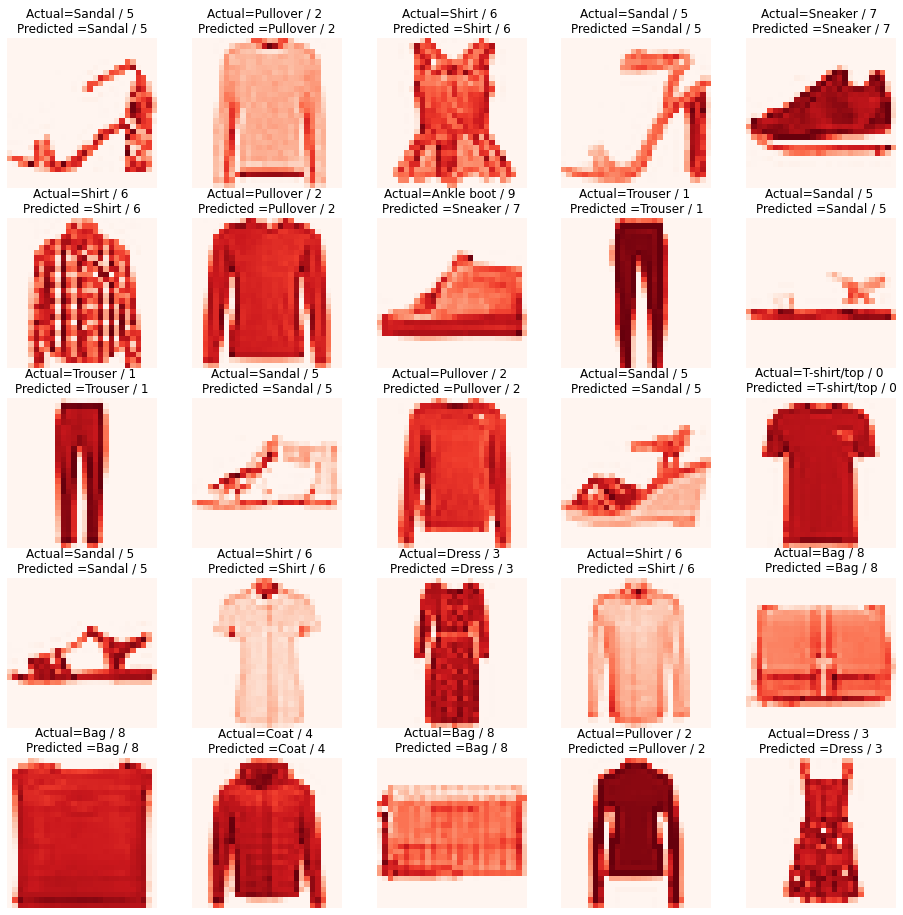

In [ ]:
plt.figure(figsize=(16,16))

j=1
for i in np.random.randint(0,1000,25):
  plt.subplot(5,5,j);j+=1
  plt.imshow(X_test[i].reshape(28,28),cmap='Reds')
  plt.title('Actual={} / {} \nPredicted ={} / {}'.format(class_labels[y_test[i]],y_test[i],class_labels[np.argmax(y_pred[i])],np.argmax(y_pred[i])))
  plt.axis('off')

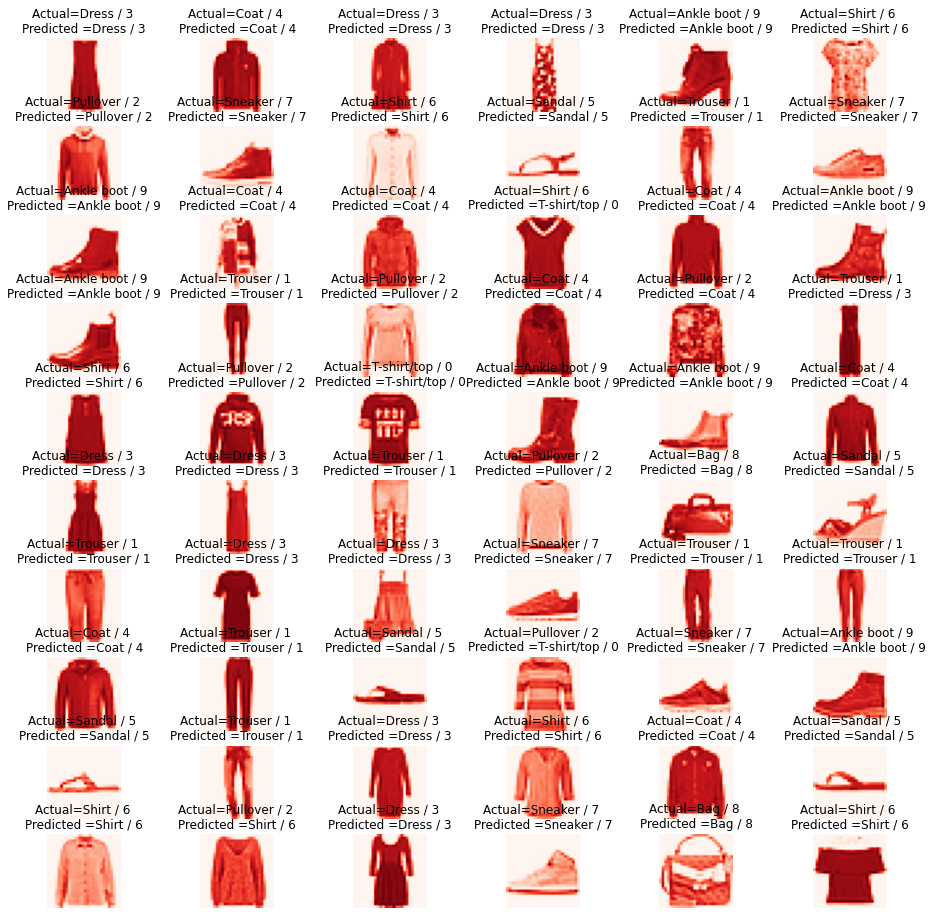

In [ ]:
plt.figure(figsize=(16,16))

j=1
for i in np.random.randint(0,1000,60):
  plt.subplot(10,6,j);j+=1
  plt.imshow(X_test[i].reshape(28,28),cmap='Reds')
  plt.title('Actual={} / {} \nPredicted ={} / {}'.format(class_labels[y_test[i]],y_test[i],class_labels[np.argmax(y_pred[i])],np.argmax(y_pred[i])))
  plt.axis('off')

In [ ]:
"""## Confusion Matrix"""

'## Confusion Matrix'

In [ ]:
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(16,9))
y_pred_labels = [np.argmax(label) for label in y_pred]
cm= confusion_matrix(y_test,y_pred_labels)

<Figure size 1152x648 with 0 Axes>

              precision    recall  f1-score   support

 T-shirt/top       0.83      0.85      0.84      1000
     Trouser       0.99      0.97      0.98      1000
    Pullover       0.87      0.79      0.83      1000
       Dress       0.90      0.91      0.90      1000
        Coat       0.80      0.90      0.85      1000
      Sandal       0.98      0.96      0.97      1000
       Shirt       0.73      0.70      0.71      1000
     Sneaker       0.93      0.98      0.96      1000
         Bag       0.98      0.98      0.98      1000
  Ankle boot       0.98      0.95      0.96      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



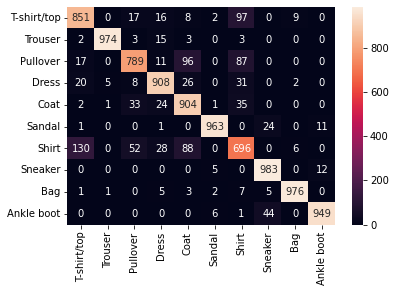

In [ ]:
sns.heatmap(cm,annot=True,fmt='d',xticklabels=class_labels,yticklabels=class_labels)
from sklearn.metrics import classification_report
cr=classification_report(y_test,y_pred_labels,target_names=class_labels)
print(cr)

In [ ]:
"""# Save Model"""

'# Save Model'

In [ ]:
model.save('fashion_mnist_cnn_model.h5')

In [ ]:
cnn_model2 = keras.models.Sequential([
                         keras.layers.Conv2D(filters=32, kernel_size=3, strides=(1,1), padding='valid',activation= 'relu', input_shape=[28,28,1]),
                         keras.layers.MaxPooling2D(pool_size=(2,2)),
                         keras.layers.Conv2D(filters=64, kernel_size=3, strides=(2,2), padding='same', activation='relu'),
                         keras.layers.MaxPooling2D(pool_size=(2,2)),
                         keras.layers.Flatten(),
                         keras.layers.Dense(units=128, activation='relu'),
                         keras.layers.Dropout(0.25),
                         keras.layers.Dense(units=256, activation='relu'),
                         keras.layers.Dropout(0.25),
                         keras.layers.Dense(units=128, activation='relu'),
                         keras.layers.Dense(units=10, activation='softmax')
                         ])

In [ ]:
cnn_model2.compile(optimizer='adam', loss= 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
cnn_model2.fit(X_train, y_train, epochs=20, batch_size=512, verbose=1, validation_data=(X_Validation, y_Validation))

Epoch 1/20
94/94 [==============================] - 28s 283ms/step - loss: 1.0231 - accuracy: 0.6148 - val_loss: 0.5911 - val_accuracy: 0.7738
Epoch 2/20
94/94 [==============================] - 26s 281ms/step - loss: 0.5545 - accuracy: 0.7890 - val_loss: 0.4626 - val_accuracy: 0.8220
Epoch 3/20
94/94 [==============================] - 26s 282ms/step - loss: 0.4701 - accuracy: 0.8254 - val_loss: 0.4098 - val_accuracy: 0.8487
Epoch 4/20
94/94 [==============================] - 27s 283ms/step - loss: 0.4166 - accuracy: 0.8464 - val_loss: 0.3832 - val_accuracy: 0.8571
Epoch 5/20
94/94 [==============================] - 28s 295ms/step - loss: 0.3772 - accuracy: 0.8608 - val_loss: 0.3453 - val_accuracy: 0.8719
Epoch 6/20
94/94 [==============================] - 26s 281ms/step - loss: 0.3504 - accuracy: 0.8717 - val_loss: 0.3377 - val_accuracy: 0.8774
Epoch 7/20
94/94 [==============================] - 28s 294ms/step - loss: 0.3303 - accuracy: 0.8773 - val_loss: 0.3232 - val_accuracy: 0.8801

In [ ]:
cnn_model2.save('fashion_mnist_cnn_model2.h5')

In [ ]:
cnn_model3 = keras.models.Sequential([
                         keras.layers.Conv2D(filters=64, kernel_size=3, strides=(1,1), padding='valid',activation= 'relu', input_shape=[28,28,1]),
                         keras.layers.MaxPooling2D(pool_size=(2,2)),
                         keras.layers.Conv2D(filters=128, kernel_size=3, strides=(2,2), padding='same', activation='relu'),
                         keras.layers.MaxPooling2D(pool_size=(2,2)),
                         keras.layers.Conv2D(filters=64, kernel_size=3, strides=(2,2), padding='same', activation='relu'),
                         keras.layers.MaxPooling2D(pool_size=(2,2)),
                         keras.layers.Flatten(),
                         keras.layers.Dense(units=128, activation='relu'),
                         keras.layers.Dropout(0.25),
                         keras.layers.Dense(units=256, activation='relu'),
                         keras.layers.Dropout(0.5),
                         keras.layers.Dense(units=256, activation='relu'),
                         keras.layers.Dropout(0.25),                        
                         keras.layers.Dense(units=128, activation='relu'),
                         keras.layers.Dropout(0.10),                         
                         keras.layers.Dense(units=10, activation='softmax')
                         ])

In [ ]:
cnn_model3.compile(optimizer='adam', loss= 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
cnn_model3.fit(X_train, y_train, epochs=50, batch_size=512, verbose=1, validation_data=(X_Validation, y_Validation))

Epoch 1/50
94/94 [==============================] - 58s 607ms/step - loss: 1.2046 - accuracy: 0.5250 - val_loss: 0.6299 - val_accuracy: 0.7494
Epoch 2/50
94/94 [==============================] - 57s 602ms/step - loss: 0.6135 - accuracy: 0.7707 - val_loss: 0.4969 - val_accuracy: 0.8107
Epoch 3/50
94/94 [==============================] - 58s 617ms/step - loss: 0.5047 - accuracy: 0.8137 - val_loss: 0.4563 - val_accuracy: 0.8346
Epoch 4/50
94/94 [==============================] - 57s 602ms/step - loss: 0.4379 - accuracy: 0.8432 - val_loss: 0.4047 - val_accuracy: 0.8458
Epoch 5/50
94/94 [==============================] - 57s 602ms/step - loss: 0.3820 - accuracy: 0.8636 - val_loss: 0.3712 - val_accuracy: 0.8643
Epoch 6/50
94/94 [==============================] - 58s 617ms/step - loss: 0.3535 - accuracy: 0.8723 - val_loss: 0.3408 - val_accuracy: 0.8777
Epoch 7/50
94/94 [==============================] - 56s 601ms/step - loss: 0.3222 - accuracy: 0.8847 - val_loss: 0.3116 - val_accuracy: 0.8867

In [ ]:
cnn_model3.evaluate(X_test, y_test)

313/313 [==============================] - 5s 17ms/step - loss: 0.4503 - accuracy: 0.9022


[0.4503236711025238, 0.9021999835968018]

In [ ]:
cnn_model3.save('fashion_mnist_cnn_model3.h5')